In [286]:
import qiskit as qk
from numpy import pi
from qiskit import *
from qiskit.tools.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath
import random as r
from math import pi
%matplotlib inline

In [287]:
sys = QuantumRegister(1)
anc = QuantumRegister(1)
cr = ClassicalRegister(1)
cir = QuantumCircuit(sys, anc, cr)

In [308]:
energy  = [E1, E2]

#in ps
step_size =.005
iterations=60
init = False
c=0.0299792

E1=82219*c          # energy eigenvalue 1 in rad.THz
E2=80515.5*c        # energy eigenvalue 2 in rad.THz 
angle_u=2.545       # angle to be used in the basis transformation matrix
site_1=2*pi*13000*c # site energy of the donor molecule, in rad.THz
site_2=2*pi*12900*c # site energy of the acceptor molecule, in rad.THz
J=2*pi*126*c 

In [289]:
""""""""
"ERot_zx (-1.5707964) (-1.1930307) 0 1"
"ERot_phase (-2.3561945) 1"
"ERot_phase 2.3561945 0"

""""""""

''

In [300]:
def rzx(cir, angx, angz, qub):
    cir.rz(2*angz, qub)
    cir.rx(angx, qub)

def ctrzx(cir, angx, angz, qub):
    cir.rx(-angx, qub)
    cir.rz(-2*angz, qub)
    
def phase(cir, qub, ang):
    cir.rz(2*ang, qub)
    
    
def ctphase(cir, qub, ang):
    cir.rz(-2*ang, qub) 
#~~~~~~~~#

def state_initialization(cir,sys,anc,init):
    cir.x(anc[0])
    if (init):
        cir.x(sys[0])
        
def one_qubit_cir(cir,sys,anc,cr, energy, step_size, cycles, init):
    state_initialization(cir,sys,anc,init)
    cir.barrier()
    #~~~~
    #ubtCir(cir,sys,anc) 
    cir.ry(2*-2.545077819162256, sys[0])
    cir.barrier()
    cir.barrier()
    evolution(cir,sys,anc,cycles*step_size,energy)
    cir.barrier()
    cir.barrier()
    cir.ry(2*2.545077819162256, sys[0])
    #ctubtCir(cir,sys,anc)
    cir.barrier()
    cir.barrier()

    
    #~~~~
    cir.barrier()
    cir.measure(sys,cr)

In [301]:
def ctubtCir(cir, sys, anc):
    ctrzx(cir, -1.5707964, -1.1930307, sys[0])
    
    ctphase(cir, sys[0], -2.3561945)

    cir.x(sys[0])
    ctphase(cir, sys[0], 2.3561945)
    cir.x(sys[0])


In [302]:
def evolution(cir, sys, anc, t, energy):
    
    cir.x(sys[0])
    cir.crz(-2*energy[0]*t, sys[0],anc[0])
    cir.x(sys[0])
    
    cir.crz(-2*energy[1]*t, sys[0],anc[0])
    

In [303]:
def ubtCir(cir, sys, anc):
    cir.x(sys[0])
    phase(cir, sys[0], 2.3561945)
    cir.x(sys[0])

    phase(cir, sys[0], -2.3561945)
    
    rzx(cir, -1.5707964, -1.1930307, sys[0])


In [309]:
def graphic(sys,anc,cr,energy,step_size,iterations,init):
    x=[]
    y1=[]
    y2=[]
    p1=0
    p2=0
    
    
    
    w=-site_1+site_2
    Gamma=math.sqrt(math.pow(w,2)+4*math.pow(J,2))
    Lambda1=(w+Gamma)/2
    Lambda2=(w-Gamma)/2
    
    for cycles in range(0,iterations):
        #!~~~~ decoherence imp
        #print(int(2*r.random())-.5)
        #~~~~!
        qc = QuantumCircuit(sys, anc, cr)
        one_qubit_cir(qc,sys,anc,cr, energy, step_size, cycles, init) 
        backend_sim = Aer.get_backend('qasm_simulator')
        job_sim = execute(qc, backend_sim, shots=5000)
        result_sim = job_sim.result()
        result_counts = result_sim.get_counts(qc)
        
        if '0' in result_counts:
            p1+=result_counts['0']/5000
        else:
            p1=0
        if '1' in result_counts:
            p2+=result_counts['1']/5000
        else:
            p2=0
        x.append(step_size*cycles)
        y1.append(p1)
        y2.append(p2)
        p1=0
        p2=0
     
    def func0(x):
        return(math.pow(abs(Lambda1*cmath.exp(-1j*Lambda1*i)/Gamma-Lambda2*cmath.exp(-1j*Lambda2*i)/Gamma),2) for i in x)
    def func1(x):
        return(math.pow(abs(J*(cmath.exp(1j*Lambda1*i)-cmath.exp(1j*Lambda2*i))/Gamma),2) for i in x)
    
    t=np.linspace(0,step_size*iterations,num=1000)    
    y_t_1=list(func0(t))
    plt.plot(t, y_t_1, 'b',label="Theory - P(0)")
    y_t_2=list(func1(t))
    plt.plot(t,y_t_2 , 'r--',label="Theory - P(1)")
    la = plt.scatter(x,y1,c='b',marker="^",label='Simulation - P(0)')
    lb = plt.scatter(x,y2,c='r',label='Simulation - P(1)')
    ll = plt.legend(loc=7)
    lx = plt.xlabel('Time (ps)')
    ly = plt.ylabel('Probability')
    xx = plt.xlim(0,cycles*step_size)
    ll = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    
    
    one_qubit_cir(cir,sys,anc,cr,energy,step_size,iterations,init)
    cir.draw(output='mpl')

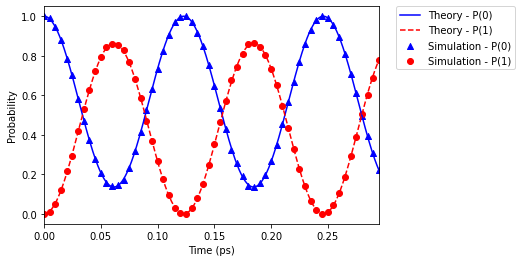

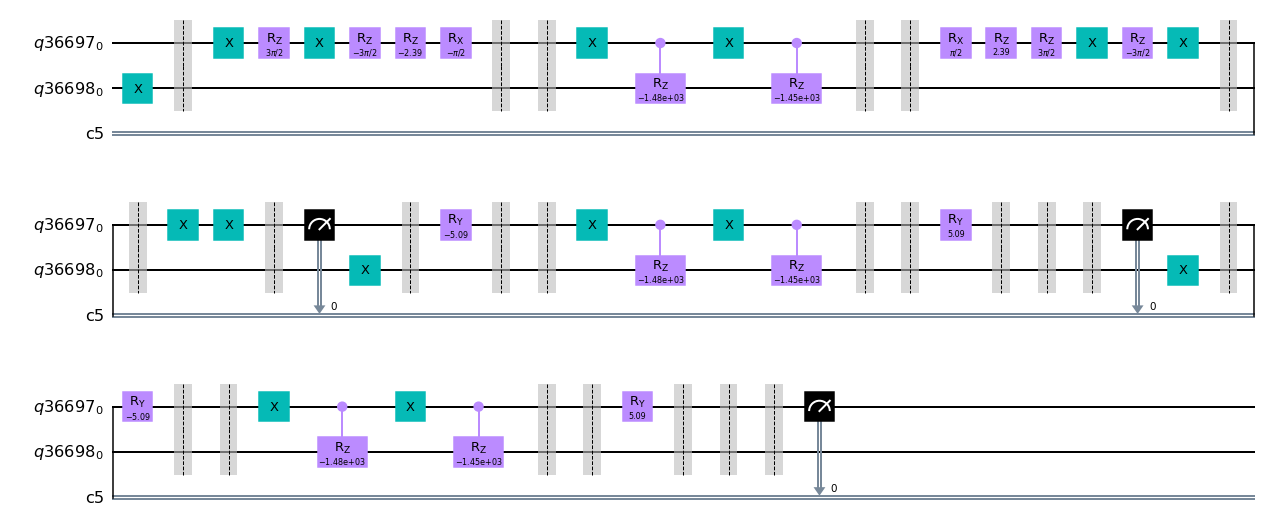

In [307]:
graphic(sys,anc,cr,energy,step_size,iterations,init)

# 

In [278]:
print(int(2*r.random())-.5)

-0.5
